In [35]:
import pandas as pd
from matplotlib import pyplot as plt

In [95]:
path = '/export/usuarios_ml4ds/mbalairon/github/recommendation_system_validation/outputs/'
recommendation = 'researchers'

In [96]:
df_2023 = pd.read_parquet(path + 'df_val_{}_2023.parquet'.format(recommendation))
df_2024 = pd.read_parquet(path + 'df_val_{}_2024.parquet'.format(recommendation))

In [122]:
methods = ['BERT', 'tfidf', 'bhattacharyya', 'embeddings']
agg_methods = ['sum', 'mean', 'mean_imp']

method = methods[3]
agg_method = agg_methods[2]

df_2023_filtrado = df_2023[df_2023['Método_Recomendación']=='{}_{}'.format(method, agg_method)]
df_2024_filtrado = df_2024[df_2024['Método_Recomendación']=='{}_{}'.format(method, agg_method)]

In [123]:
df_2023_filtrado['id'] = df_2023_filtrado['Nombre'].str.cat(df_2023_filtrado['Topic'], sep='_')
df_2024_filtrado['id'] = df_2024_filtrado['Nombre'].str.cat(df_2024_filtrado['Topic'], sep='_')

df_2023_filtrado = df_2023_filtrado[['id', 'score_posicion', 'score_similitud', 'score_department', 'score']].rename(columns={'score_posicion':'score_posicion_2023', 'score_similitud':'score_similitud_2023', 'score_department':'score_department_2023', 'score':'score_2023'})
df_2024_filtrado = df_2024_filtrado[['id', 'score_posicion', 'score_similitud', 'score_department', 'score']].rename(columns={'score_posicion':'score_posicion_2024', 'score_similitud':'score_similitud_2024', 'score_department':'score_department_2024', 'score':'score_2024'})

df_plot = pd.merge(df_2023_filtrado, df_2024_filtrado, on='id')

/tmp/ipykernel_3084476/2188568027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_filtrado['id'] = df_2023_filtrado['Nombre'].str.cat(df_2023_filtrado['Topic'], sep='_')
/tmp/ipykernel_3084476/2188568027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_filtrado['id'] = df_2024_filtrado['Nombre'].str.cat(df_2024_filtrado['Topic'], sep='_')


2023 score mean: 0.5851556203379588
2024 score mean: 0.6256344131757651


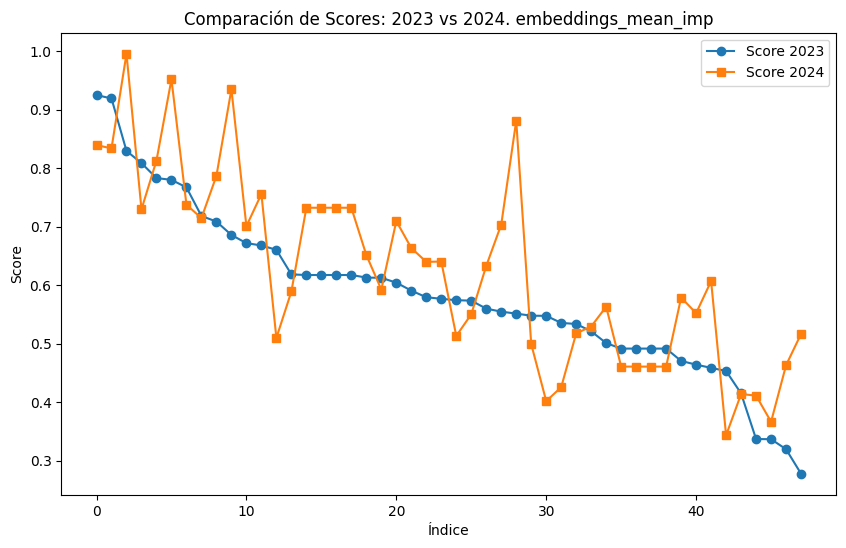

In [124]:
# Definir el tamaño del gráfico
print('2023 score mean:', df_plot['score_2023'].mean())
print('2024 score mean:', df_plot['score_2024'].mean())

plt.figure(figsize=(10, 6))

# Plotear los scores de 2023 y 2024
plt.plot(df_plot.index, df_plot['score_2023'], marker='o', label='Score 2023')
plt.plot(df_plot.index, df_plot['score_2024'], marker='s', label='Score 2024')

# Añadir etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Score')
plt.title('Comparación de Scores: 2023 vs 2024. {}_{}'.format(method, agg_method))

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

2023 score posicion mean: 0.7097592592592593
2024 score posicion mean: 0.7740933170334149

2023 score similitud mean: 0.8888379157834873
2024 score similitud mean: 0.8621349431762156

2023 score department mean: 0.15686968597112994
2024 score department mean: 0.2406749793176648



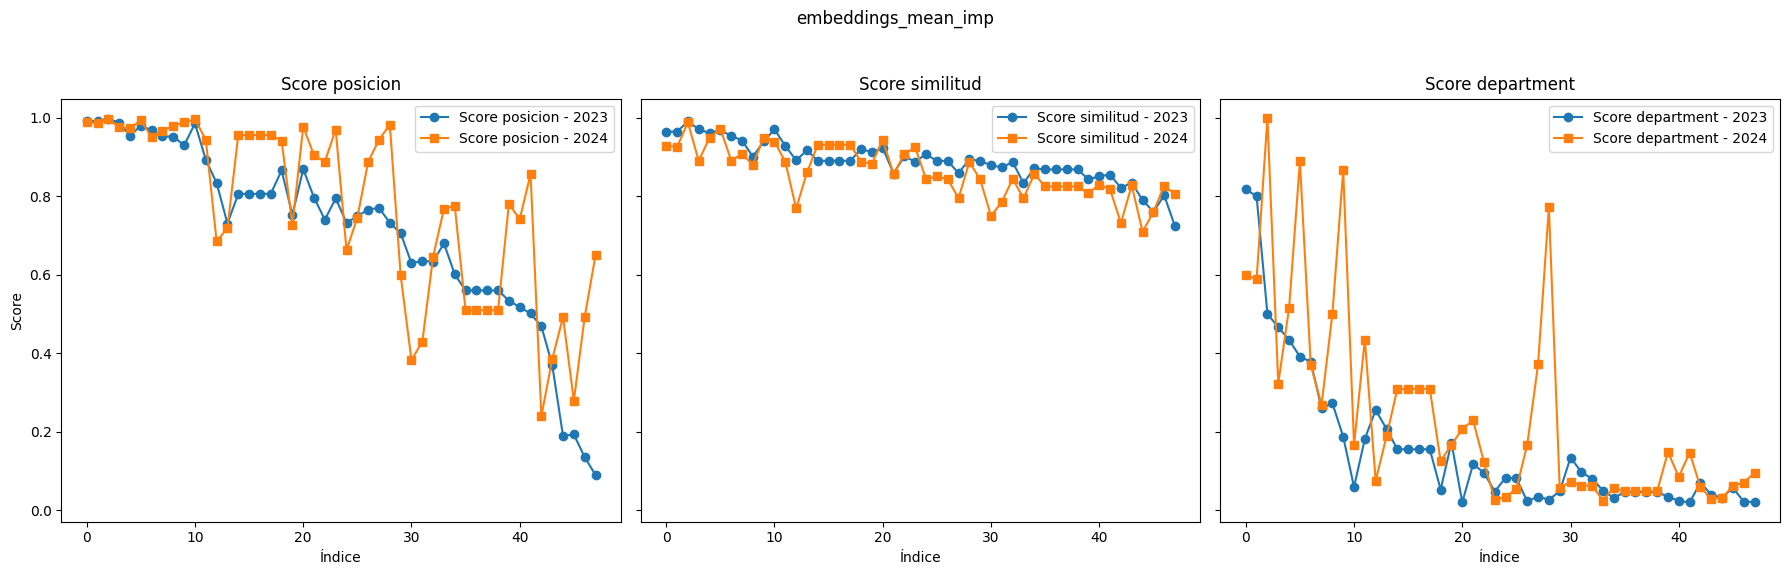

In [125]:
print('2023 score posicion mean:', df_plot['score_posicion_2023'].mean())
print('2024 score posicion mean:', df_plot['score_posicion_2024'].mean())
print()
print('2023 score similitud mean:', df_plot['score_similitud_2023'].mean())
print('2024 score similitud mean:', df_plot['score_similitud_2024'].mean())
print()
print('2023 score department mean:', df_plot['score_department_2023'].mean())
print('2024 score department mean:', df_plot['score_department_2024'].mean())
print()

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Score Type 1
axs[0].plot(df_plot.index, df_plot['score_posicion_2023'], marker='o', label='Score posicion - 2023')
axs[0].plot(df_plot.index, df_plot['score_posicion_2024'], marker='s', label='Score posicion - 2024')
axs[0].set_title('Score posicion')
axs[0].set_xlabel('Índice')
axs[0].set_ylabel('Score')
axs[0].legend()

# Score Type 2
axs[1].plot(df_plot.index, df_plot['score_similitud_2023'], marker='o', label='Score similitud - 2023')
axs[1].plot(df_plot.index, df_plot['score_similitud_2024'], marker='s', label='Score similitud - 2024')
axs[1].set_title('Score similitud')
axs[1].set_xlabel('Índice')
axs[1].legend()

# Score Type 3
axs[2].plot(df_plot.index, df_plot['score_department_2023'], marker='o', label='Score department - 2023')
axs[2].plot(df_plot.index, df_plot['score_department_2024'], marker='s', label='Score department - 2024')
axs[2].set_title('Score department')
axs[2].set_xlabel('Índice')
axs[2].legend()

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()
plt.suptitle('{}_{}'.format(method, agg_method))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar el rect para dar espacio al supertítulo

# Mostrar el gráfico
plt.show()